## Data Analysis
----
In this interactive notebook, we follow up our work cleaning up our datasets and taking the daily means by state and parameter by doing some analysis and visualization on the trends seen in these data.

To start, we will import our required libraries.

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates
from pyaqs import AQSFetcher

%matplotlib inline
sns.set()
sns.set_context('poster')

Let's read in our cleaned and averaged dataframe from our previous notebook and get to work doing some analysis and visualizations!

In [26]:
main_data = pd.read_csv('cleaned_data/criteria_gasses_aqi_means.csv')

In [27]:
main_data.head()

,state_name,parameter_code,sample_duration,date_local,state_code,county_code,site_num,arithmetic_mean,aqi
0,Alabama,42101,8-HR RUN AVG END HOUR,2010-01-01,1.0,73.0,2345.0,0.280702,3.333333
1,Alabama,42101,8-HR RUN AVG END HOUR,2010-01-02,1.0,73.0,2345.0,0.288889,3.333333
2,Alabama,42101,8-HR RUN AVG END HOUR,2010-01-03,1.0,73.0,2345.0,0.277778,3.333333
3,Alabama,42101,8-HR RUN AVG END HOUR,2010-01-04,1.0,73.0,2345.0,0.361111,5.333333
4,Alabama,42101,8-HR RUN AVG END HOUR,2010-01-05,1.0,73.0,2345.0,0.404166,5.333333


In [28]:
main_data.shape

(670344, 9)

In [29]:
state_list = main_data.state_name.unique()

In [30]:
state_list

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [31]:
ca_test = main_data.loc[main_data.state_name == 'California']

In [32]:
ca_test.head()

,state_name,parameter_code,sample_duration,date_local,state_code,county_code,site_num,arithmetic_mean,aqi
48474,California,42101,8-HR RUN AVG END HOUR,2010-01-01,6.0,52.884058,1708.739130,0.484141,9.362319
48475,California,42101,8-HR RUN AVG END HOUR,2010-01-02,6.0,52.882353,1719.117647,0.517762,10.014706
48476,California,42101,8-HR RUN AVG END HOUR,2010-01-03,6.0,52.253731,1744.716418,0.510220,9.477612
48477,California,42101,8-HR RUN AVG END HOUR,2010-01-04,6.0,53.085714,1684.528571,0.564786,9.900000
48478,California,42101,8-HR RUN AVG END HOUR,2010-01-05,6.0,52.859155,1661.028169,0.619934,10.309859


In [33]:
ca_8hr = ca_test.loc[ca_test.sample_duration == '8-HR RUN AVG END HOUR']
ca_1hr = ca_test.loc[ca_test.sample_duration == '1 HOUR']

In [34]:
ca_test = ca_test.groupby(['parameter_code', 'date_local']).mean().reset_index()

In [35]:
ca_test.head()

,parameter_code,date_local,state_code,county_code,site_num,arithmetic_mean,aqi
0,42101,2010-01-01,6.0,52.884058,1708.739130,0.484141,9.362319
1,42101,2010-01-02,6.0,52.882353,1719.117647,0.517762,10.014706
2,42101,2010-01-03,6.0,52.253731,1744.716418,0.510220,9.477612
3,42101,2010-01-04,6.0,53.085714,1684.528571,0.564786,9.900000
4,42101,2010-01-05,6.0,52.859155,1661.028169,0.619934,10.309859


In [36]:
ca_test.parameter_code.value_counts()

42602    3287
42401    3287
44201    3287
42101    3287
Name: parameter_code, dtype: int64

In [37]:
ca_test.date_local = pd.to_datetime(ca_test.date_local)

In [38]:
aqs_fetcher = AQSFetcher('bbjornstad.flatiron@gmail.com', 'ochrefox21')

In [39]:
param_df = aqs_fetcher.get_parameter_list_by_class('AQI POLLUTANTS')
criteria_gasses = param_df.iloc[:4,:]
criteria_gasses

,code,parameter_description
0,42101,Carbon monoxide
1,42401,Sulfur dioxide
2,42602,Nitrogen dioxide (NO2)
3,44201,Ozone


In [40]:
gas_legend = criteria_gasses 
gas_legend.parameter_description = ['CO', 'SO2', 'NO2', 'Ozone']
gas_legend['legend_entry'] = gas_legend.apply(lambda r: f'{r.code} - {r.parameter_description}', axis=1)
gas_legend

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,code,parameter_description,legend_entry
0,42101,CO,42101 - CO
1,42401,SO2,42401 - SO2
2,42602,NO2,42602 - NO2
3,44201,Ozone,44201 - Ozone


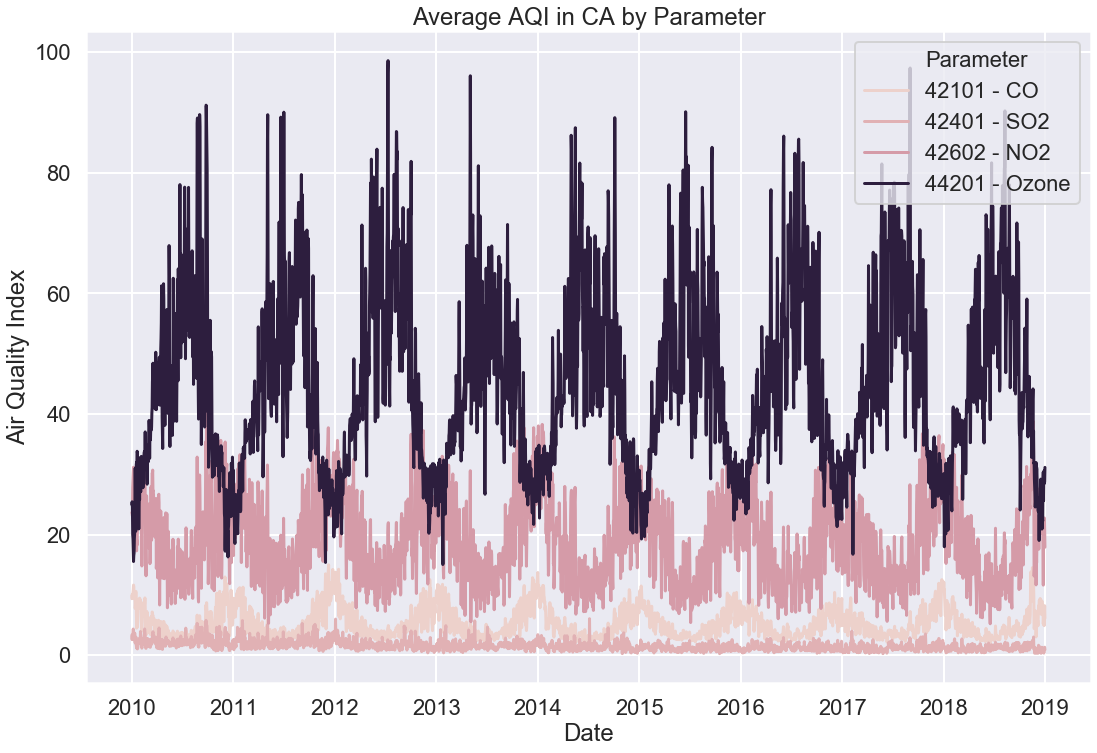

In [41]:
fig, ax = plt.subplots(figsize=(18,12))

sns.lineplot(
    x='date_local',
    y='aqi',
    hue='parameter_code',
    data=ca_test,
    ax=ax,
    legend='full')

ax.set_title('Average AQI in CA by Parameter')
ax.set_ylabel('Air Quality Index')
ax.set_xlabel('Date')
leg = ax.get_legend()
leg.texts[0].set_text('Parameter')
for l in leg.texts[1:]:
    index = l.get_text()
    new_label = gas_legend.loc[gas_legend.code == index, 'legend_entry'].values[0]
    l.set_text(new_label)

In [42]:
ca_test.dtypes 

parameter_code              int64
date_local         datetime64[ns]
state_code                float64
county_code               float64
site_num                  float64
arithmetic_mean           float64
aqi                       float64
dtype: object

Let's try partial autocorrelation plots.

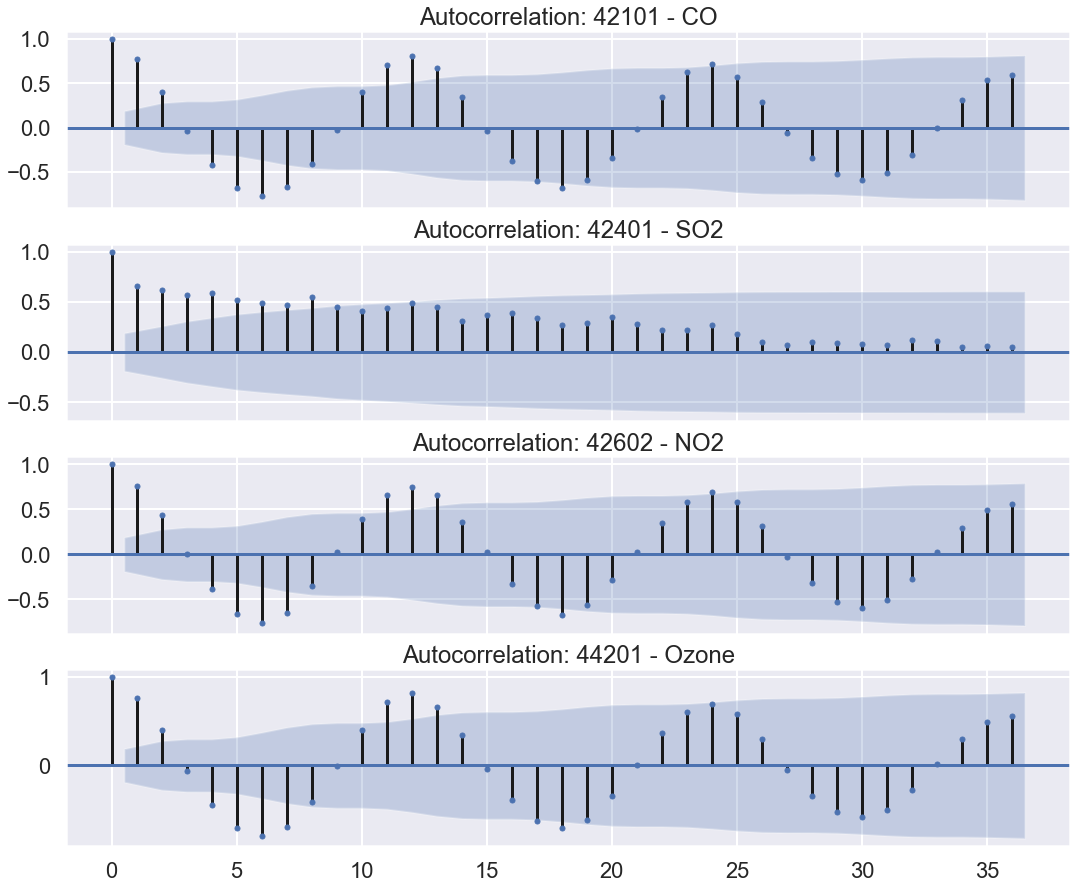

In [50]:
fig, axes = plt.subplots(len(ca_test.parameter_code.unique()), 1, figsize=(18, 15), sharex=True);

test_df = pd.DataFrame()

for i, param in enumerate(ca_test.parameter_code.unique()):
    subset = ca_test.loc[ca_test.parameter_code == param]
    subset.set_index('date_local', inplace=True)
    monthly_averages = subset.resample('MS').mean()
    test_df = monthly_averages.reset_index()
    sm.graphics.tsa.plot_acf(monthly_averages.aqi, ax=axes[i], lags=36)
    plot_label = gas_legend.loc[gas_legend.code == str(param), 'legend_entry'].values[0]
    axes[i].set_title(f'Autocorrelation: {plot_label}')

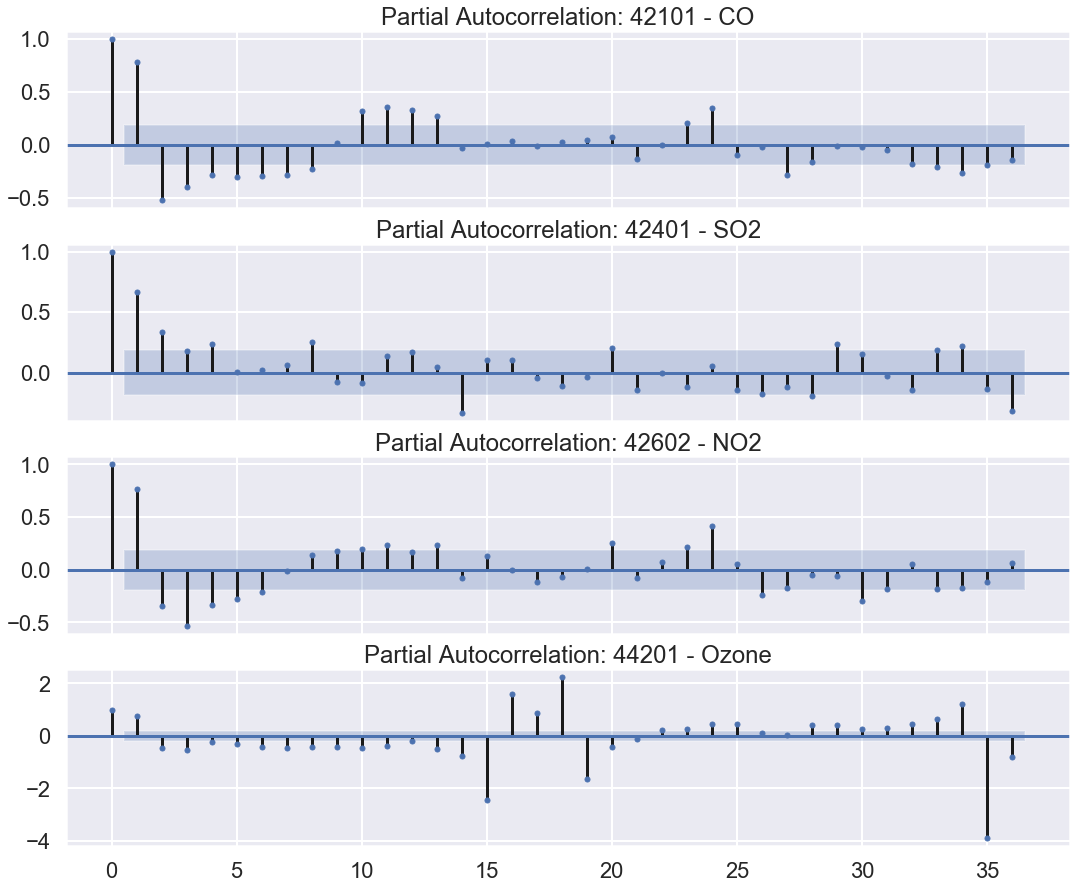

In [51]:
fig, axes = plt.subplots(len(ca_test.parameter_code.unique()), 1, figsize=(18, 15), sharex=True);

test_df = pd.DataFrame()

for i, param in enumerate(ca_test.parameter_code.unique()):
    subset = ca_test.loc[ca_test.parameter_code == param]
    subset.set_index('date_local', inplace=True)
    monthly_averages = subset.resample('MS').mean()
    test_df = monthly_averages.reset_index()
    sm.graphics.tsa.plot_pacf(monthly_averages.aqi, ax=axes[i], lags=36)
    plot_label = gas_legend.loc[gas_legend.code == str(param), 'legend_entry'].values[0]
    axes[i].set_title(f'Partial Autocorrelation: {plot_label}')

Dude wtf.

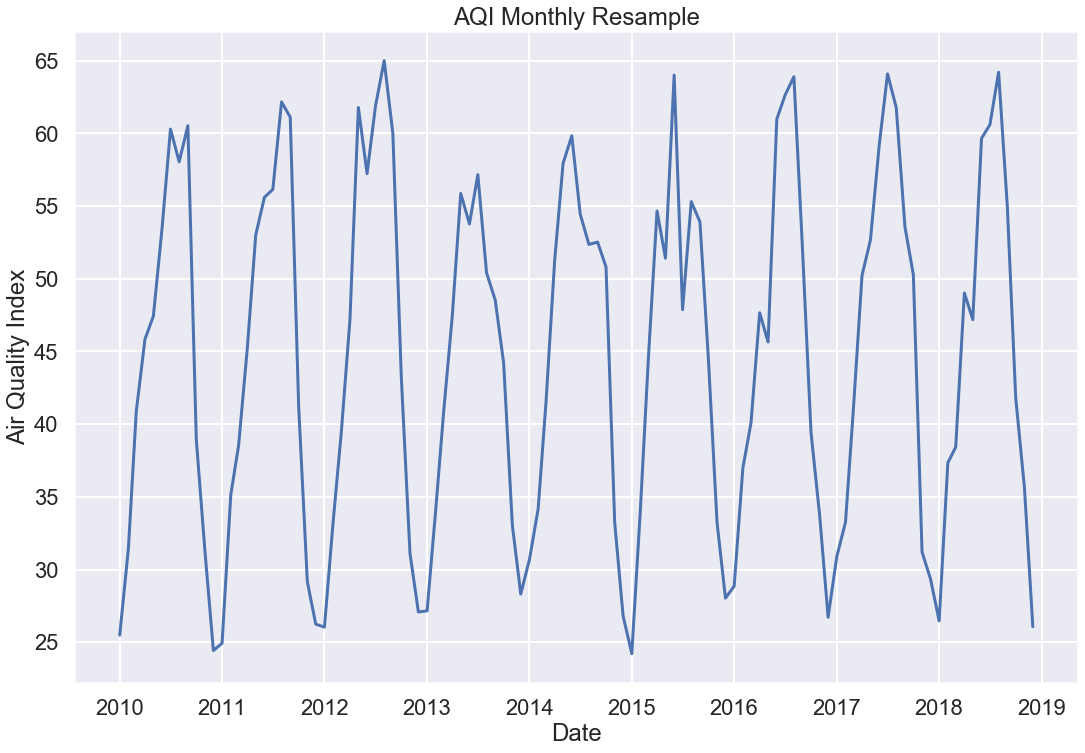

In [49]:
fig, ax = plt.subplots(figsize=(18, 12))

sns.lineplot(x='date_local', y='aqi', data=test_df, ax=ax)
ax.set_title('AQI Monthly Resampling')
ax.set_ylabel('Air Quality Index')
ax.set_xlabel('Date');

In [46]:
test_df.head()

,date_local,parameter_code,state_code,county_code,site_num,arithmetic_mean,aqi
0,2010-01-01,44201,6.0,59.729798,1558.628065,0.019609,25.488745
1,2010-02-01,44201,6.0,60.172783,1571.867337,0.024607,31.472266
2,2010-03-01,44201,6.0,59.968566,1577.743423,0.033054,40.879655
3,2010-04-01,44201,6.0,60.895882,1568.735798,0.036668,45.844511
4,2010-05-01,44201,6.0,60.768448,1521.054457,0.037611,47.434735
